## Separation by neighborhood similarity



In [1]:
function w=separeby_nhsimilarity(V, Vin, Ven, W, k)
    M=zeros(length(V));
    A=zeros(length(V));
    for i=1:length(Vin)
        A(Vin(i),Ven(i))=W(i);
        A(Ven(i),Vin(i))=W(i);
    end
    for i=1:length(V)
        d(i)=sum(A(i,:));
    end
    for i=1:length(V)
        for j=1:length(V);
            if d(i)>0
                M(i,j)=A(i,j)/d(i);
            else
                xyz=0;
            end
        end
    end
    Pmkvis=zeros(length(V));
    for i=1:k
        x=M^i;
        Pmkvis = Pmkvis + x;
    end
    for i=1:length(W)
        w1(i)=exp(2*k - sum(abs(Pmkvis(Vin(i),:) - Pmkvis(Ven(i),:))))-1;
    end
    w=w1;
end

In [2]:
V=[];
for i=1:12
    for j=1:6
        V=[V;i,j];
    end
end

V=[V;13,3];
V=[V;13,4];
for i=14:17
    for j=1:6
        V=[V;i,j];
    end
end

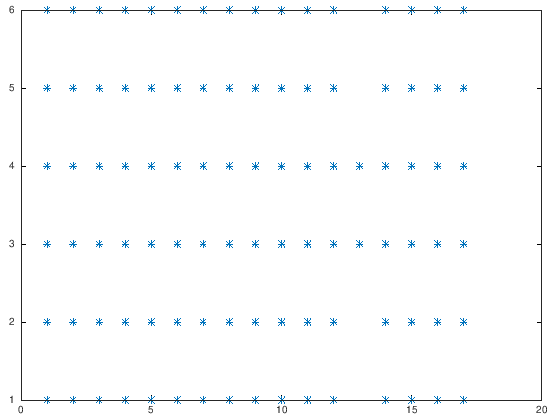

In [3]:
plot(V(:,1),V(:,2),'*')

In [4]:
dis=[];
for i=1:length(V)
    for j=1:length(V)
        dis(i,j)= sqrt((((V(i,1))- (V(j,1)))^2)+ (((V(i,2))- (V(j,2)))^2));
    end 
end

In [5]:
In=[];
Or=[];
for i=1:98
    [O,I]=sort(dis(i,:));
    In=[In;I];
    Or=[Or;O];
end

In=In(:,2:11);
Or=Or(:,2:11);
Vin=[];
Ven=[];
cont=1;
for i=1:98
    for j=1:10
        IIn=In(i,j);
        for k=1:10
            if In(IIn,k)==i
                Vin(cont)=i;
                Ven(cont)=IIn; 
                cont=cont+1;
                break;
            end
        end
    end
end

j=1;
M_pos=zeros(max(Vin));
for i=1:length(Vin)
    if Vin(i)<Ven(i)
        x=Vin(i);
        y=Ven(i);
    else
        y=Vin(i);
        x=Ven(i);
    end
    if M_pos(x,y)==0
        nVin(j)=Vin(i);
        nVen(j)=Ven(i);
        j=j+1;
    end
    M_pos(x,y)=1;
end

Vin=nVin;
Ven=nVen;
ave=0;
for i=1:length(Vin)
    ave = ave + dis(Vin(i),Ven(i));
end

ave=ave/length(Vin);
for i=1:length(Vin)
    W(i)=exp(-(dis(Vin(i),Ven(i)))^2/(ave^2));
end
v=sort(I);
k=2;
ite=3;
for i=1:ite
    w=separeby_nhsimilarity(v,Vin,Ven,W,k);
    W=w;
end
con=[Vin; Ven; W];

In [6]:
save('data.mat','con','V')

In [7]:
%% ejemplo paper
v=[1:21];
W=[ 1,1,1,1,1,1,1,1,1,1,1,1,1.5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1 ];
Vin= [1, 1, 1, 2, 3, 2, 5, 5, 5, 6, 6, 7, 7,   8, 9,  10,  9,   9,   9,   4, 10, 11, 13, 12, 12, 13, 13, 14, 16, 15, 18, 19, 18, 18, 20 ];
Ven=[2, 3, 4, 3, 4, 5. 6, 7, 8, 8, 7, 8, 11, 9, 10, 11, 13, 12, 19, 19, 13, 14, 14, 13, 15, 17, 16, 17, 17, 16, 19, 21, 21, 20, 21 ];
k=3;
ite=4;
for i=1:ite
     w=separeby_nhsimilarity(v,Vin,Ven,W,k);
     W=w;
end
v=[Vin,Ven];
cl= zeros(1,max(v));

x=Vin(1);
cl(Vin(1))=1;
c=1;
cont=0;

In [8]:
while cont<max(v)
    for i=1: length(Vin)
        if W(i)>6.5
            if cl( Vin(i) )==c || cl( Ven(i) )==c
            cl( Vin(i) )=c;
            cl( Ven(i) )=c;
            end
        end
    end
    c=c+1;
    cont=0;
    for i=1:length(cl)
        if cl(i)==0
            cl(i)=c;
            break;
        else
            cont=cont+1;
        end
    end
end

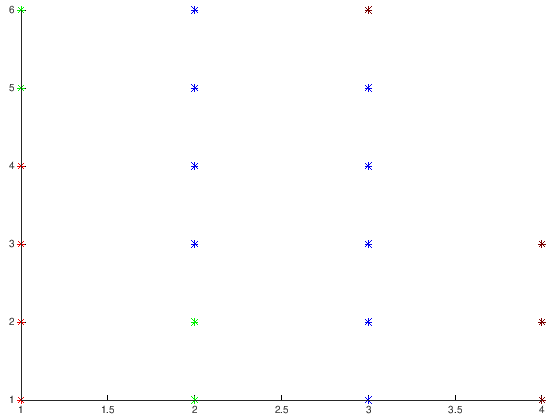

In [9]:
%% graph the data
colorspec = { [ (0+18*0.052) (0+0*0.052) (0+0*0.052) ]; ...
                     [ (0+0*0.052) (0+18*0.052) (0+0*0.052) ]; ...
                     [ (0+0*0.052) (0+0*0.052) (0+18*0.052) ]; ...
                     [ (0+9*0.052) (0+0*0.052) (0+0*0.052) ]; ...
                     [ (0+0*0.052) (0+9*0.052) (0+0*0.052) ]; ...
                     [ (0+0*0.052) (0+0*0.052) (0+9*0.052) ]; ...
                     [ (0+4.5*0.052) (0+0*0.052) (0+0*0.052) ]; ...
                     [ (0+0*0.052) (0+4.5*0.052) (0+0*0.052) ]; ...
                     [ (0+0*0.052) (0+0*0.052) (0+4.5*0.052) ]; };
figure(1); cla;
hold on
for i = 1:length(cl)
     plot(V(i,1),V(i,2),'*', 'Color', colorspec{cl(i)})
end